In [14]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from numpy import asarray 

In [17]:
# load the image as pixel array
filepath = "test_hole.png"
img = Image.open(filepath)


# summarize image details
print(img.format)
print(img.mode)
print(img.size)
asarray(img)

PNG
RGB
(350, 360)


array([[[  0, 162, 232],
        [  0, 162, 232],
        [  0, 162, 232],
        ...,
        [  0, 162, 232],
        [  0, 162, 232],
        [  0, 162, 232]],

       [[  0, 162, 232],
        [  0, 162, 232],
        [  0, 162, 232],
        ...,
        [  0, 162, 232],
        [  0, 162, 232],
        [  0, 162, 232]],

       [[  0, 162, 232],
        [  0, 162, 232],
        [  0, 162, 232],
        ...,
        [  0, 162, 232],
        [  0, 162, 232],
        [  0, 162, 232]],

       ...,

       [[  0, 162, 232],
        [  0, 162, 232],
        [  0, 162, 232],
        ...,
        [  0, 162, 232],
        [  0, 162, 232],
        [  0, 162, 232]],

       [[  0, 162, 232],
        [  0, 162, 232],
        [  0, 162, 232],
        ...,
        [  0, 162, 232],
        [  0, 162, 232],
        [  0, 162, 232]],

       [[  0, 162, 232],
        [  0, 162, 232],
        [  0, 162, 232],
        ...,
        [  0, 162, 232],
        [  0, 162, 232],
        [  0, 162, 232]]

In [1]:
import cv2 # Import the OpenCV library
import numpy as np

filepath = "test_hole.png"
image = cv2.imread(filepath)
image_mark = image.copy()
# define range of white color in HSV
lower_white = np.array([0,0,255])
upper_white = np.array([255,255,255])

# Create the mask
mask = cv2.inRange(image_mark, lower_white, upper_white)

# Create the inverted mask
mask_inv = cv2.bitwise_not(mask)

# Convert to grayscale image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Extract the dimensions of the original image
rows, cols, channels = image.shape
image = image[0:rows, 0:cols]

# Bitwise-OR mask and original image
colored_portion = cv2.bitwise_or(image, image, mask = mask)
colored_portion = colored_portion[0:rows, 0:cols]

# Bitwise-OR inverse mask and grayscale image
gray_portion = cv2.bitwise_or(gray, gray, mask = mask_inv)
gray_portion = np.stack((gray_portion,)*3, axis=-1)

# Combine the two images
output = colored_portion + gray_portion

# Save the image
OUTPUT_IMAGE = "test_hole_mask.jpg"
cv2.imwrite(OUTPUT_IMAGE, output)

True

## Working prototype

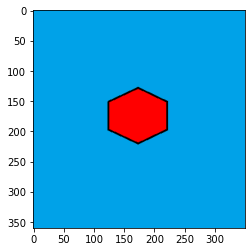

In [98]:

import cv2 # Import the OpenCV library
import numpy as np
filepath = "test_hole.png"
image = cv2.imread(filepath)

# load mask image
mask = cv2.imread("blue_blob_thresh.png", 0) # loading as garyscale image

# get the boudary coordinates using contour detection
contours = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
contours = contours[0] if len(contours) == 2 else contours[1]
cntr = contours[0]

# get hole coordinates (x,y)
xy_coords = np.flip(np.column_stack(np.where(mask > 0)), axis=1)

# fill the hole
temp_img = image.copy()
for i in xy_coords:
    x = i[0]
    y = i[1]
    temp_img[y,x] = (0, 0, 255)

# show results
plt.imshow(cv2.cvtColor(temp_img, cv2.COLOR_BGR2RGB))

## End of prototype

In [ ]:
# fill point function
def fill_pixel(x, y, channels=3, **kwargs):
    """
    applying a fill algorithm on image coordinate
    input:
    x - the x coordinate of the target pixel
    y - the y coordinate of the targert pixel
    channels - number of channels in the image (either 1 or 3)
    """
    # validating number of requested channels 
    if channels not in [1,3]:
        raise Exception("The fill pixel method supports only a single channel image or a 3 channels image!\n you defined {0} ".format(channels))
    elif channels == 1:
        val = 210.0 # single channel image fill return float
    elif channels == 3:
        val = (0, 0, 255) # 3 channels image filled as RGB return tuple

    return(img)
    


In [95]:
def defaultWeight_func(v, u, z=1, epsilon=0.01):
    """
    input:
    u - coordinate in hole
    v - coordinate in boundary
    z - integer factor 
    epsilon - small float value used to avoid division by 0
    output:
    wz - non-negative float weight
    """
    import numpy as np 

    dist = np.linalg.norm(u-v)
    wz = 1.0/((dist**z)+epsilon)
    return(wz)

In [ ]:
def fill_color():
    """
    input:
    img - the image
    u - coordinate in hole
    v - coordinate in boundary
    z - integer factor 
    epsilon - small float value used to avoid division by 0
    """
    

In [113]:
xy_coords

array([[173, 130],
       [171, 131],
       [172, 131],
       ...,
       [174, 217],
       [175, 217],
       [173, 218]], dtype=int64)

In [122]:
temp_img[153,208]

array([  0, 255, 255], dtype=uint8)

In [164]:
b_coords = boundaryDetect8(mask)

In [165]:
for u in xy_coords:
    wz_iv_list = []
    wz_list = []
    for v in b_coords :
        vx=v[0]
        vy=v[1]
        iv = image[vy,vx] 
        wz = defaultWeight_func(v=v[0], u=u)
        wz_iv_list.append(wz*iv)
        wz_list.append(wz)
    
    iu = sum(wz_iv_list)/sum(wz_list)
    temp_img[u[1],u[0]] = iu

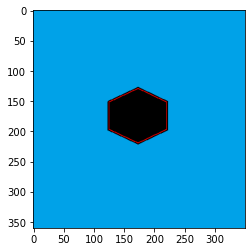

In [166]:
plt.imshow(cv2.cvtColor(temp_img, cv2.COLOR_BGR2RGB))

In [ ]:
def boundaryFill4(img, x, y, fill_color, hole_xycoords, channels=3, **kwargs):
    if (([x,y] in xy_coords) & (fill_color != tuple(img[y,x])):
        img[y,x] = fill_pixel(x=x, y=y, channels=channels)
        boundaryFill4(img, x+1, y, fill_color, hole_xycoords, channels=channels)
        boundaryFill4(img, x, y+1, fill_color, hole_xycoords, channels=channels)
        boundaryFill4(img, x-1, y, fill_color, hole_xycoords, channels=channels)
        boundaryFill4(img, x, y-1, fill_color, hole_xycoords, channels=channels)



In [ ]:
def boundaryDetection(img, x, y,  b_list=[]):
    if img[y,x]==0:
        if img[y,x+1]>0:
            b_list.append([x,y])
            return(b_list)
        elif img[y,x-1]>0:
            b_list.append([x,y])
        elif img[y+1,x]>0:
            b_list.append([x,y])
        elif img[y-1,x]>0:
            b_list.append([x,y])
        b_list.append([y,x])
        boundaryDetection(img, x=x+1, y=y,  b_list=b_list)
    

In [143]:
mask.shape

(360, 350)

In [163]:
# works! 4 - connected
def boundaryDetect4(img_mask):
    """
    get a single chanel binary mask image and return the boundary pixels coordinates
    input: 
    img_mask - the mask of an image
    output:
    list of coordinates arrays ordered as [x,y]
    """
    b_list=[]
    cols, rows = img_mask.shape
    for y in range(cols-1):
        for x in range(rows-1):
            if img_mask[y,x]==0:
                if img_mask[y,x+1]>0:
                    b_list.append([x,y])
                elif img_mask[y,x-1]>0:
                    b_list.append([x,y])
                elif img_mask[y+1,x]>0:
                    b_list.append([x,y])
                elif img_mask[y-1,x]>0:
                    b_list.append([x,y])
    return(b_list)


In [162]:
# works! 8 - connected
def boundaryDetect8(img_mask):
    """
    get a single chanel binary mask image and return the boundary pixels coordinates
    input: 
    img_mask - the mask of an image
    output:
    list of coordinates arrays ordered as [x,y]
    """
    b_list=[]
    cols, rows = img_mask.shape
    for y in range(cols-1):
        for x in range(rows-1):
            if img_mask[y,x]==0:
                if img_mask[y,x+1]>0:
                    b_list.append([x,y])
                elif img_mask[y,x-1]>0:
                    b_list.append([x,y])
                elif img_mask[y+1,x]>0:
                    b_list.append([x,y])
                elif img_mask[y-1,x]>0:
                    b_list.append([x,y])
                elif img_mask[y-1,x-1]>0:
                    b_list.append([x,y])
                elif img_mask[y+1,x-1]>0:
                    b_list.append([x,y])
                elif img_mask[y-1,x+1]>0:
                    b_list.append([x,y])
                elif img_mask[y+1,x+1]>0:
                    b_list.append([x,y])
    return(b_list)


In [157]:
image[172,129]

array([255, 255, 255], dtype=uint8)

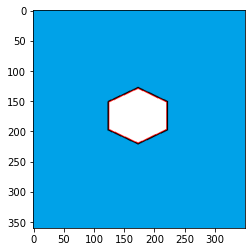

In [160]:
# fill the hole
temp_img = image.copy()
for i in b_list:
    x = i[0]
    y = i[1]
    temp_img[y,x] = (0, 0, 255)

# show results
plt.imshow(cv2.cvtColor(temp_img, cv2.COLOR_BGR2RGB))

In [127]:
contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

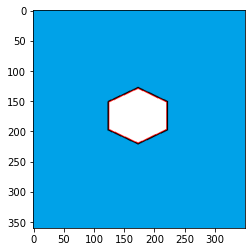

In [151]:

import cv2 # Import the OpenCV library
import numpy as np
filepath = "test_hole.png"
image = cv2.imread(filepath)

# load mask image
mask = cv2.imread("blue_blob_thresh.png", 0) # loading as garyscale image

# get the boudary coordinates using contour detection
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cntr = contours[0]


# get hole coordinates (x,y)
xy_coords = np.flip(np.column_stack(np.where(mask > 0)), axis=1)

# fill the hole
temp_img = image.copy()
for i in b_list:
    x = i[0]
    y = i[1]
    temp_img[y,x] = (0, 0, 255)

# show results
plt.imshow(cv2.cvtColor(temp_img, cv2.COLOR_BGR2RGB))

In [80]:
tuple(temp_img[60,50])

(232, 162, 0)

In [85]:
[373, 231] in xy_coords

False

In [74]:
mask = cv2.imread("blue_blob_thresh.png", 0) # loading as garyscale image
# get coordinates (x,y)
xy_coords = np.flip(np.column_stack(np.where(mask > 0)), axis=1)

In [75]:
xy_coords

array([[173, 130],
       [171, 131],
       [172, 131],
       ...,
       [174, 217],
       [175, 217],
       [173, 218]], dtype=int64)

In [76]:
temp_img = image.copy()
for i in xy_coords:
    x = i[0]
    y = i[1]
    temp_img[y,x] = (0, 0, 255)



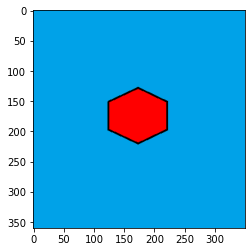

In [77]:
plt.imshow(cv2.cvtColor(temp_img, cv2.COLOR_BGR2RGB))

In [107]:
# get contours
mask = cv2.imread("blue_blob_thresh.png", 0) # loading as garyscale image
#mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
result = np.zeros_like(image)
contours = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
contours = contours[0] if len(contours) == 2 else contours[1]
cntr = contours[0]
cv2.drawContours(result, [cntr], 0, (0,0,255), 1)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [108]:
# print number of points along contour
print('number of points: ',len(cntr))

print('')

# list contour points
for pt in cntr:
    print(pt)

# save resulting images
cv2.imwrite('blue_blob_thresh.png',mask)
cv2.imwrite('blue_blob_contour.png',result) 

# show thresh and contour   
#cv2.imshow("thresh", mask)
#cv2.imshow("result", result)

number of points:  274

[[173 130]]
[[172 131]]
[[171 131]]
[[170 132]]
[[169 132]]
[[168 133]]
[[167 133]]
[[166 133]]
[[165 134]]
[[164 134]]
[[163 135]]
[[162 135]]
[[161 136]]
[[160 136]]
[[159 137]]
[[158 137]]
[[157 138]]
[[156 138]]
[[155 139]]
[[154 139]]
[[153 140]]
[[152 140]]
[[151 141]]
[[150 141]]
[[149 141]]
[[148 142]]
[[147 142]]
[[146 143]]
[[145 143]]
[[144 144]]
[[143 144]]
[[142 145]]
[[141 145]]
[[140 146]]
[[139 146]]
[[138 147]]
[[137 147]]
[[136 148]]
[[135 148]]
[[134 149]]
[[133 149]]
[[132 149]]
[[131 150]]
[[130 150]]
[[129 151]]
[[128 151]]
[[127 152]]
[[126 152]]
[[126 153]]
[[126 154]]
[[126 155]]
[[126 156]]
[[126 157]]
[[126 158]]
[[126 159]]
[[126 160]]
[[126 161]]
[[126 162]]
[[126 163]]
[[126 164]]
[[126 165]]
[[126 166]]
[[126 167]]
[[126 168]]
[[126 169]]
[[126 170]]
[[126 171]]
[[126 172]]
[[126 173]]
[[126 174]]
[[126 175]]
[[126 176]]
[[126 177]]
[[126 178]]
[[126 179]]
[[126 180]]
[[126 181]]
[[126 182]]
[[126 183]]
[[126 184]]
[[126 185]]
[[12

True

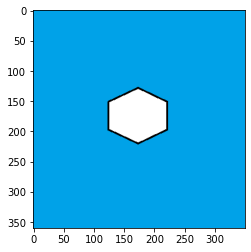

In [106]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
t_image = image.copy()
for i in cntr:
    t_image[i] == (0,0,255)

plt.imshow(cv2.cvtColor(t_image, cv2.COLOR_BGR2RGB))


In [28]:
cv2.imshow(t_image)

TypeError: imshow() missing required argument 'mat' (pos 2)

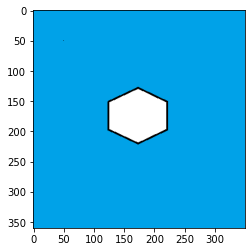

In [31]:
t_image[50,50] = (0, 0, 0)
plt.imshow(cv2.cvtColor(t_image, cv2.COLOR_BGR2RGB))

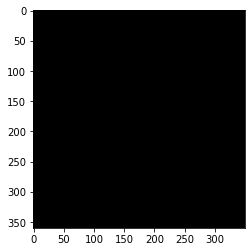

In [41]:
# Initialize empty list
lst_intensities = []

# For each list of contour points...
for i in range(len(cntr)):
    # Create a mask image that contains the contour filled in
    cimg = np.zeros_like(image)
    cv2.drawContours(cimg, cntr, i, color=255, thickness=-1)

    # Access the image pixels and create a 1D numpy array then add to list
    pts = np.where(cimg == 255)
    lst_intensities.append(image[pts[0], pts[1]])


In [ ]:
def load_image_return_array(filepath):
    from PIL import Image
    from numpy import asarray 
    
    # load the image as Pillow object
    img = Image.open(filepath)

    # summarize image details
    print("image details:\n")
    print(img.format)
    print(img.mode)
    print(img.size)

    # convert to numpy array
    img_data = asarray(img)
    return(img_data)







In [16]:
from  fill_hole_funcs import img_holes
filepath = "test_hole.png"
imgData = img_holes(filepath).load_image_return_array()
print(imgData)

image details:

PNG
RGB
(350, 360)
[[[  0 162 232]
  [  0 162 232]
  [  0 162 232]
  ...
  [  0 162 232]
  [  0 162 232]
  [  0 162 232]]

 [[  0 162 232]
  [  0 162 232]
  [  0 162 232]
  ...
  [  0 162 232]
  [  0 162 232]
  [  0 162 232]]

 [[  0 162 232]
  [  0 162 232]
  [  0 162 232]
  ...
  [  0 162 232]
  [  0 162 232]
  [  0 162 232]]

 ...

 [[  0 162 232]
  [  0 162 232]
  [  0 162 232]
  ...
  [  0 162 232]
  [  0 162 232]
  [  0 162 232]]

 [[  0 162 232]
  [  0 162 232]
  [  0 162 232]
  ...
  [  0 162 232]
  [  0 162 232]
  [  0 162 232]]

 [[  0 162 232]
  [  0 162 232]
  [  0 162 232]
  ...
  [  0 162 232]
  [  0 162 232]
  [  0 162 232]]]
